In [15]:
from importlib import reload
from scipy.stats import boxcox
from dfprepare import norm_data

import Task_3.LRR as LRR
reload(LRR)
from Task_3.LRR import *

,carbon_monoxide,tar,nicotine,weight
0,14.1,0.86,0.9853,13.6
1,16.0,1.06,1.0938,16.6
2,29.8,2.03,1.1650,23.5
3,8.0,0.67,0.9280,10.2
4,4.1,0.40,0.9462,5.4
5,15.0,1.04,0.8885,15.0
6,8.8,0.76,1.0267,9.0
7,12.4,0.95,0.9225,12.3
8,16.6,1.12,0.9372,16.3
9,14.9,1.02,0.8858,15.4


,carbon_monoxide,tar,nicotine,weight
0,0.454861,0.384211,0.526981,0.550000
1,0.520833,0.489474,0.812582,0.686364
2,1.000000,1.000000,1.000000,1.000000
3,0.243056,0.284211,0.376152,0.395455
4,0.107639,0.142105,0.424059,0.177273
5,0.486111,0.478947,0.272177,0.613636
6,0.270833,0.331579,0.635957,0.340909
7,0.395833,0.431579,0.361674,0.490909
8,0.541667,0.521053,0.400369,0.672727
9,0.482639,0.468421,0.265070,0.631818


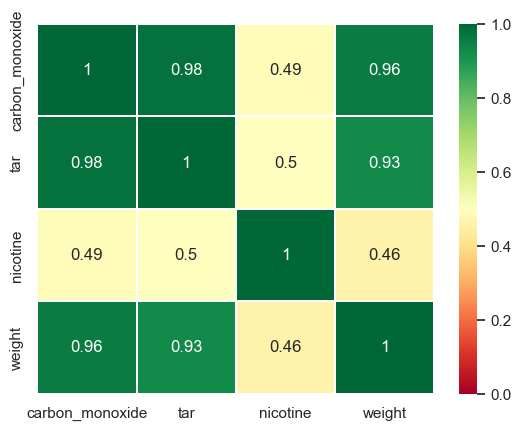

In [16]:
# Read dataframe
data = pd.read_csv('cigarettes.txt', names=['Brand', 'carbon_monoxide', 'tar', 'nicotine', 'weight'])
data = data.drop('Brand', axis=1)
data.dropna(inplace=True)
display(data)

# Normalization
data = norm_data(data)
display(data)

# Correlation
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

# Dependent variable
explore_column = 'carbon_monoxide' 

### Строим базовую модель

In [17]:
base_research = LinearRegressionResearch(y=data[explore_column], x=data.drop(columns=explore_column),
                                         degree=2)
base_research.info()
# base_research.draw_plots()
new_data = base_research.stepwise_selection(criteria='AIC')

                               carbon_monoxide                                
Dep. Variable:        carbon_monoxide   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     90.93
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           1.90e-11
Time:                        03:59:33   Log-Likelihood:                 55.903
No. Observations:                  25   AIC:                            -91.81
Df Residuals:                      15   BIC:                            -79.62
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0047      0.03

,Variable,VIF,Tolerance
0,const,21.344227,0.046851
1,tar,195.791396,0.005107
2,nicotine,34.674155,0.028840
3,weight,233.750796,0.004278
4,tar&tar,2409.053565,0.000415
5,tar&nicotine,518.466544,0.001929
6,tar&weight,6394.627345,0.000156
7,nicotine&nicotine,38.365743,0.026065
8,nicotine&weight,282.840881,0.003536
9,weight&weight,1456.732858,0.000686


,const,tar,nicotine,weight,tar&tar,tar&nicotine,tar&weight,nicotine&nicotine,nicotine&weight,weight&weight,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023450,0.880334619236074,15.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041502,0.8413101623708019,15.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.073774,0.17039500865985538,15.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.247346,0.05709203320372766,15.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.060693,0.31937863764560825,15.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.584924,0.07776009742698352,15.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.707980,0.4133288739137928,15.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.486540,0.49614529713557143,15.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.631779,0.1255695129096897,15.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.590987,0.45397255176311435,15.0,1.0


,dfb_const,dfb_tar,dfb_nicotine,dfb_weight,dfb_tar&tar,dfb_tar&nicotine,dfb_tar&weight,dfb_nicotine&nicotine,dfb_nicotine&weight,dfb_weight&weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.030554,-0.303723,-0.012614,0.298238,-0.283608,0.256477,0.281479,-0.269860,-0.095721,-0.317550,0.040530,1.518645,0.149469,0.636628,1.594872,0.668583
1,-0.092015,-0.086177,0.091062,0.102601,0.334343,-0.085710,-0.277614,0.099225,-0.072409,0.216094,0.030097,-0.473320,0.573278,-0.548611,-0.460724,-0.534012
2,0.355466,-1.465541,0.074326,0.989654,1.078206,0.159967,-0.560354,0.031430,-0.215919,0.166081,8.365117,1.140820,0.984680,9.146101,1.153305,9.246195
3,-0.111925,0.565888,0.186601,-0.611139,0.148894,-0.324359,-0.206918,0.068815,0.232277,0.344982,0.061516,-1.644472,0.185320,-0.784321,-1.754743,-0.836914
4,0.027430,-0.014800,0.199112,-0.058436,0.028694,-0.088194,0.001084,-0.086817,0.036965,0.010499,0.007636,0.345229,0.390497,0.276330,0.334856,0.268027
5,0.001107,-0.013186,-0.031861,0.026836,0.005806,-0.015904,0.004022,0.059518,-0.007867,-0.012040,0.001324,0.215560,0.221722,0.115055,0.208574,0.111326
6,0.026571,-0.097429,-0.058559,0.091729,-0.034701,-0.042581,0.069458,0.022388,0.058948,-0.099134,0.006519,-0.405989,0.283399,-0.255314,-0.394395,-0.248023
7,-0.012958,0.062005,-0.006837,-0.037022,0.041152,-0.059893,-0.036524,-0.012871,0.070512,0.023225,0.001823,0.268586,0.201727,0.135018,0.260105,0.130754
8,-0.020581,0.019310,0.052757,-0.036584,-0.094493,-0.030003,0.100265,-0.043026,0.026291,-0.079932,0.005528,0.533988,0.162374,0.235107,0.520856,0.229325
9,-0.016293,0.064041,0.078250,-0.084733,0.006285,-0.042960,-0.011418,-0.118207,0.086565,0.017870,0.004161,-0.340702,0.263882,-0.203988,-0.330430,-0.197838


,student_resid,unadj_p,bonferroni(p)
0,1.594872,0.133060,1.0
1,-0.460724,0.652072,1.0
2,1.153305,0.268096,1.0
3,-1.754743,0.101153,1.0
4,0.334856,0.742698,1.0
5,0.208574,0.837785,1.0
6,-0.394395,0.699232,1.0
7,0.260105,0.798569,1.0
8,0.520856,0.610607,1.0
9,-0.330430,0.745968,1.0


                                STEPS AIC                              
Selected Features: ['tar', 'nicotine', 'weight', 'tar&tar', 'tar&nicotine', 'tar&weight', 'nicotine&nicotine', 'nicotine&weight', 'weight&weight']
AIC: -91.80565013733724
Selected Features: ['nicotine', 'weight', 'tar&tar', 'tar&nicotine', 'tar&weight', 'nicotine&nicotine', 'nicotine&weight', 'weight&weight']
AIC: -93.73657576233774
Selected Features: ['nicotine', 'weight', 'tar&tar', 'tar&nicotine', 'tar&weight', 'nicotine&weight', 'weight&weight']
AIC: -94.99469041876492
Selected Features: ['nicotine', 'weight', 'tar&tar', 'tar&nicotine', 'tar&weight', 'nicotine&weight']
AIC: -95.64965543511224
Selected Features: ['nicotine', 'weight', 'tar&tar', 'tar&nicotine', 'nicotine&weight']
AIC: -97.4607396233792
Selected Features: ['nicotine', 'weight', 'tar&nicotine', 'nicotine&weight']
AIC: -98.13598341363107
Selected Features: ['weight', 'tar&nicotine', 'nicotine&weight']
AIC: -99.33389011608745


### Проведём исследование улучшенной модели с помощью (AIC/BIC)

In [18]:
display(new_data)

,carbon_monoxide,weight,tar&nicotine,nicotine&weight
0,0.454861,0.550000,0.202472,0.289839
1,0.520833,0.686364,0.397738,0.557727
2,1.000000,1.000000,1.000000,1.000000
3,0.243056,0.395455,0.106906,0.148751
4,0.107639,0.177273,0.060261,0.075174
5,0.486111,0.613636,0.130358,0.167018
6,0.270833,0.340909,0.210870,0.216803
7,0.395833,0.490909,0.156091,0.177549
8,0.541667,0.672727,0.208613,0.269339
9,0.482639,0.631818,0.124164,0.167476


                               carbon_monoxide                                
Dep. Variable:        carbon_monoxide   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     318.2
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           1.17e-17
Time:                        03:59:33   Log-Likelihood:                 53.667
No. Observations:                  25   AIC:                            -99.33
Df Residuals:                      21   BIC:                            -94.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0261      0.017     

,Variable,VIF,Tolerance
0,const,7.174982,0.139373
1,weight,2.496635,0.400539
2,tar&nicotine,15.230096,0.065659
3,nicotine&weight,18.604422,0.053751


,const,weight,tar&nicotine,nicotine&weight,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.0,2.500425,0.1287608755296682,21.0,1.0
1,0.0,1.0,0.0,0.0,306.938561,5.2027251336601814e-14,21.0,1.0
2,0.0,0.0,1.0,0.0,45.203270,1.1862703168383336e-06,21.0,1.0
3,0.0,0.0,0.0,1.0,23.960461,7.684215272943368e-05,21.0,1.0
4,"[1.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0]",1234.304008,1.3848430140408962e-24,21.0,4.0


,dfb_const,dfb_weight,dfb_tar&nicotine,dfb_nicotine&weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.041125,0.029563,-0.213199,0.187617,0.041318,1.658512,0.056679,0.406535,1.736241,0.425588
1,-0.014683,-0.068013,-0.158742,0.189133,0.013948,0.411448,0.247873,0.236203,0.403161,0.231445
2,-0.075381,-0.012173,0.228668,-0.117120,0.047528,0.184457,0.848198,0.436018,0.180158,0.425855
3,-0.240669,0.024512,-0.002049,0.040191,0.034251,-1.544992,0.054281,-0.370143,-1.601523,-0.383686
4,-0.173363,0.111151,-0.015416,0.003636,0.008150,-0.448762,0.139321,-0.180553,-0.440062,-0.177052
5,-0.038788,0.127594,0.041765,-0.082045,0.006713,0.408276,0.138736,0.163863,0.400028,0.160552
6,-0.174605,0.100309,-0.102929,0.070197,0.012377,-0.690915,0.093966,-0.222503,-0.682060,-0.219652
7,0.009908,0.020452,0.021817,-0.028460,0.000595,0.176460,0.070985,0.048777,0.172335,0.047637
8,-0.077181,0.162071,0.019440,-0.061732,0.011246,0.629430,0.101969,0.212098,0.620138,0.208967
9,0.003345,-0.009491,-0.002248,0.005302,0.000035,-0.028315,0.150216,-0.011905,-0.027634,-0.011618


,student_resid,unadj_p,bonferroni(p)
0,1.736241,0.097902,1.0
1,0.403161,0.691107,1.0
2,0.180158,0.858842,1.0
3,-1.601523,0.124939,1.0
4,-0.440062,0.664611,1.0
5,0.400028,0.693376,1.0
6,-0.682060,0.503024,1.0
7,0.172335,0.864906,1.0
8,0.620138,0.542169,1.0
9,-0.027634,0.978228,1.0


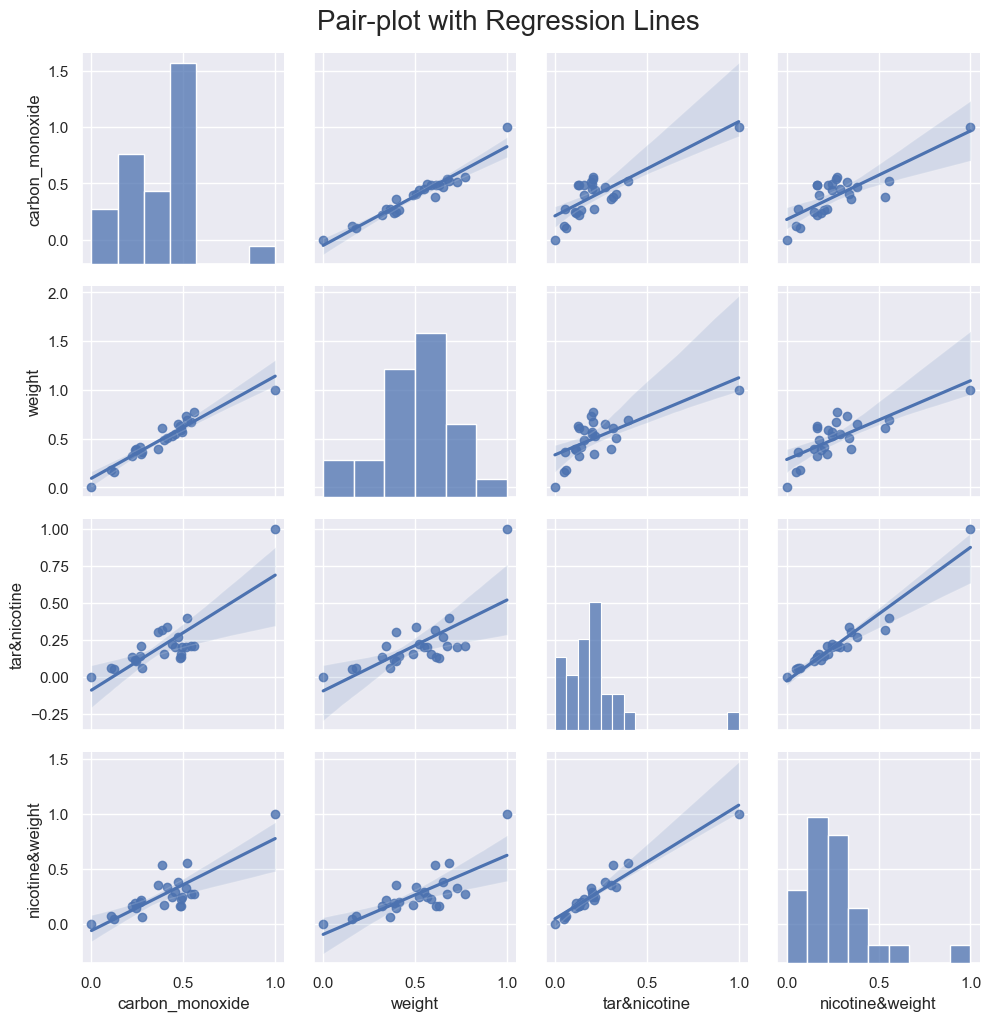

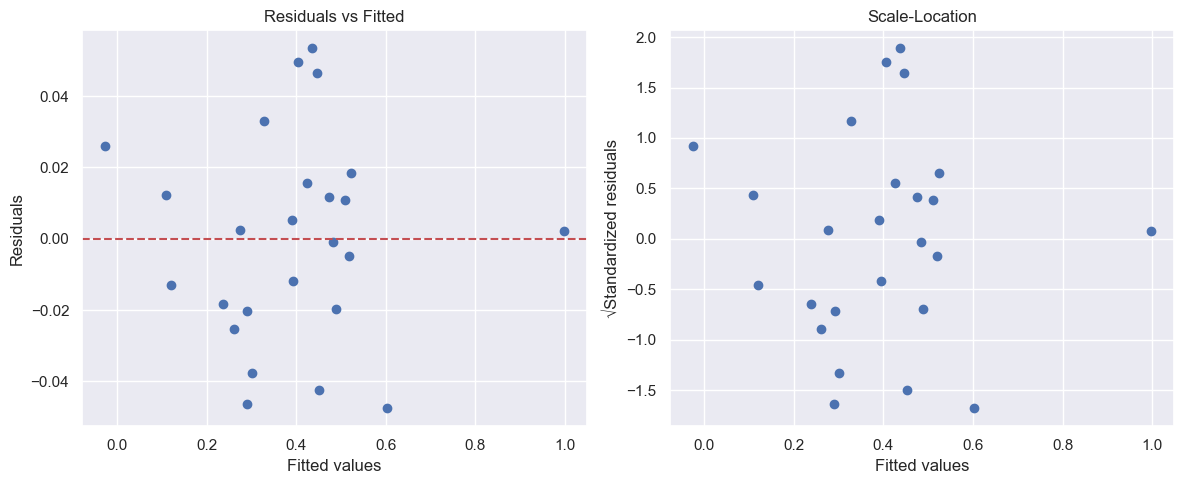

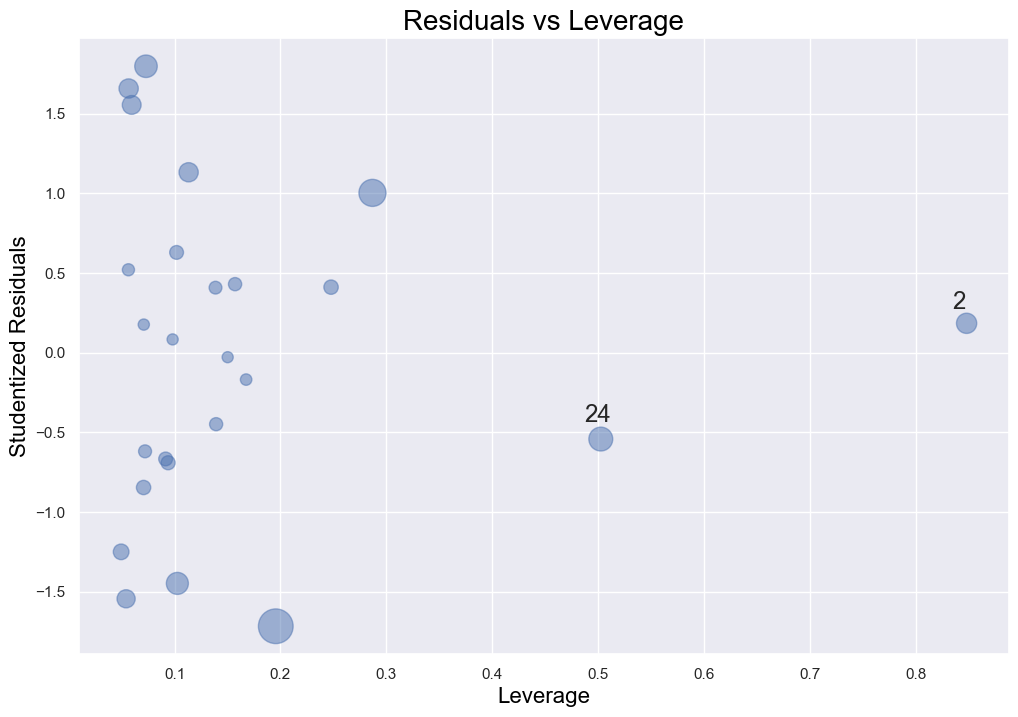

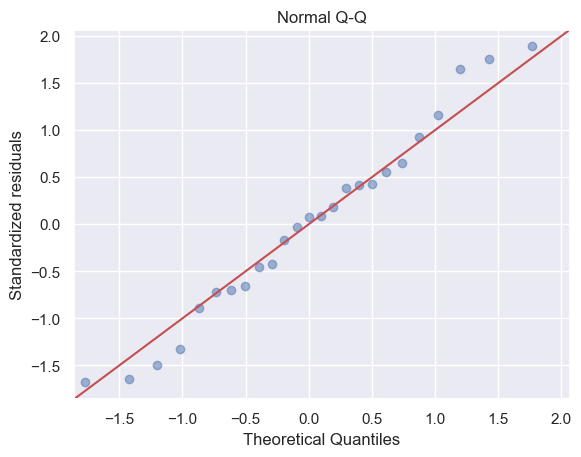

In [19]:
# Проводим анализ заново
enhanced_research = LinearRegressionResearch(y=new_data[explore_column], 
                                             x=new_data.drop(columns=explore_column))
enhanced_research.info()
enhanced_research.draw_plots()

### Попытаемся улучшить уже улучшенную модель при помощи (Box-Cox)

In [20]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, lambda_value = boxcox(data[explore_column] + 1e-6)  # + 1 чтобы не было 0-значений
new_data_t = new_data.copy()
new_data_t[explore_column] = y_transformed
display(new_data_t)

,carbon_monoxide,weight,tar&nicotine,nicotine&weight
0,-6.276137e-01,0.550000,0.202472,0.289839
1,-5.397048e-01,0.686364,0.397738,0.557727
2,9.999998e-07,1.000000,1.000000,1.000000
3,-9.529931e-01,0.395455,0.106906,0.148751
4,-1.228423e+00,0.177273,0.060261,0.075174
5,-5.853793e-01,0.613636,0.130358,0.167018
6,-9.051851e-01,0.340909,0.210870,0.216803
7,-7.106973e-01,0.490909,0.156091,0.177549
8,-5.128836e-01,0.672727,0.208613,0.269339
9,-5.900174e-01,0.631818,0.124164,0.167476


                               carbon_monoxide                                
Dep. Variable:        carbon_monoxide   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     134.6
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           7.15e-14
Time:                        03:59:38   Log-Likelihood:                 31.336
No. Observations:                  25   AIC:                            -54.67
Df Residuals:                      21   BIC:                            -49.80
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.4613      0.040    -

,Variable,VIF,Tolerance
0,const,7.174982,0.139373
1,weight,2.496635,0.400539
2,tar&nicotine,15.230096,0.065659
3,nicotine&weight,18.604422,0.053751


,const,weight,tar&nicotine,nicotine&weight,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.0,1309.434404,2.090190610136467e-20,21.0,1.0
1,0.0,1.0,0.0,0.0,168.188316,1.717095340925591e-11,21.0,1.0
2,0.0,0.0,1.0,0.0,7.248944,0.01363807084231984,21.0,1.0
3,0.0,0.0,0.0,1.0,5.796637,0.025333983946341884,21.0,1.0
4,"[1.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0]",731.270803,3.2665709213452785e-22,21.0,4.0


,dfb_const,dfb_weight,dfb_tar&nicotine,dfb_nicotine&weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.027636,0.019866,-0.143271,0.126080,0.020103,1.156850,0.056679,0.283568,1.166761,0.285997
1,-0.009702,-0.044938,-0.104886,0.124967,0.006117,0.272478,0.247873,0.156423,0.266383,0.152924
2,1.049283,0.169447,-3.182979,1.630277,7.017334,-2.241334,0.848198,-5.298050,-2.507735,-5.927769
3,-0.089354,0.009101,-0.000761,0.014922,0.005234,-0.603971,0.054281,-0.144697,-0.594602,-0.142452
4,-0.102600,0.065782,-0.009123,0.002152,0.002872,-0.266418,0.139321,-0.107189,-0.260437,-0.104783
5,0.002107,-0.006932,-0.002269,0.004457,0.000020,-0.022268,0.138736,-0.008937,-0.021732,-0.008722
6,0.170606,-0.098011,0.100571,-0.068590,0.011829,0.675439,0.093966,0.217519,0.666439,0.214621
7,0.030428,0.062813,0.067003,-0.087406,0.005541,0.538585,0.070985,0.148876,0.529273,0.146302
8,0.002662,-0.005590,-0.000670,0.002129,0.000014,-0.021916,0.101969,-0.007385,-0.021388,-0.007207
9,0.046360,-0.131548,-0.031159,0.073482,0.006757,-0.391024,0.150216,-0.164402,-0.382997,-0.161027


,student_resid,unadj_p,bonferroni(p)
0,1.166761,0.257031,1.000000
1,0.266383,0.792672,1.000000
2,-2.507735,0.020886,0.522138
3,-0.594602,0.558777,1.000000
4,-0.260437,0.797189,1.000000
5,-0.021732,0.982877,1.000000
6,0.666439,0.512745,1.000000
7,0.529273,0.602442,1.000000
8,-0.021388,0.983148,1.000000
9,-0.382997,0.705762,1.000000


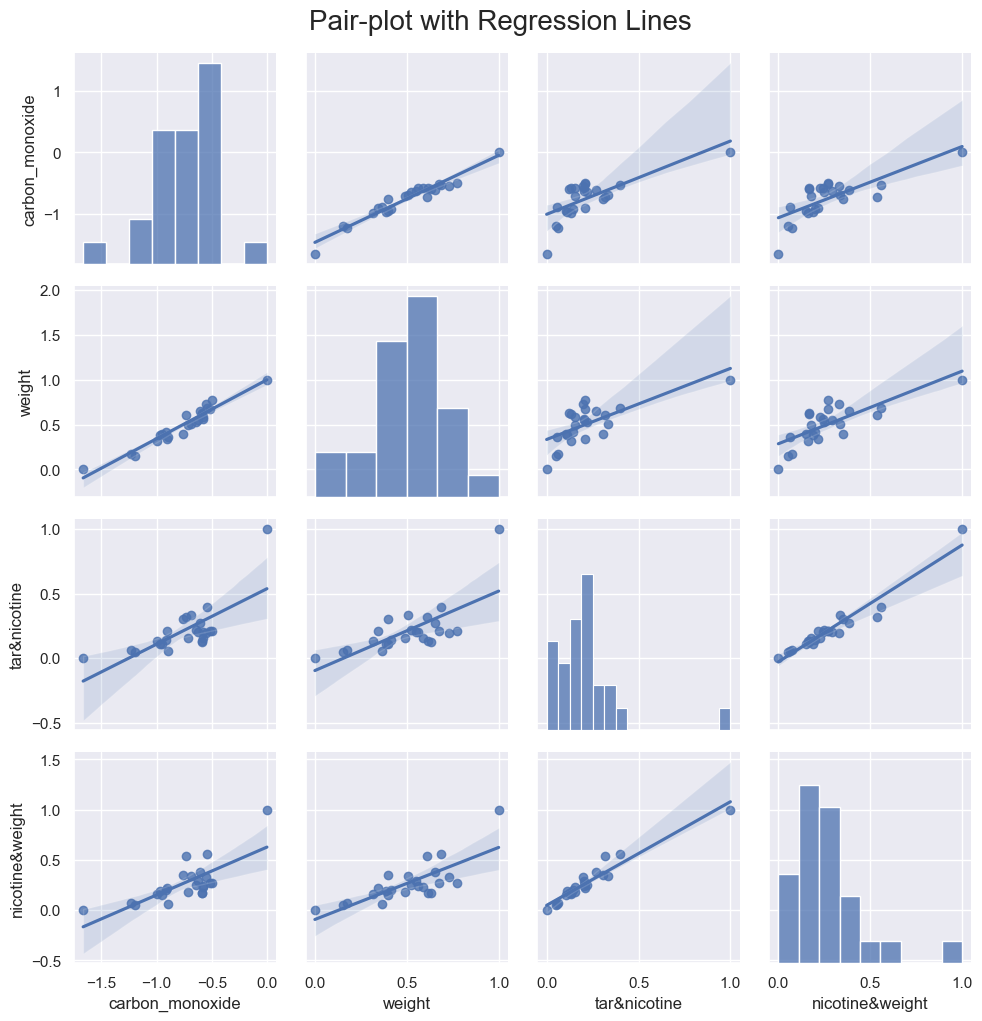

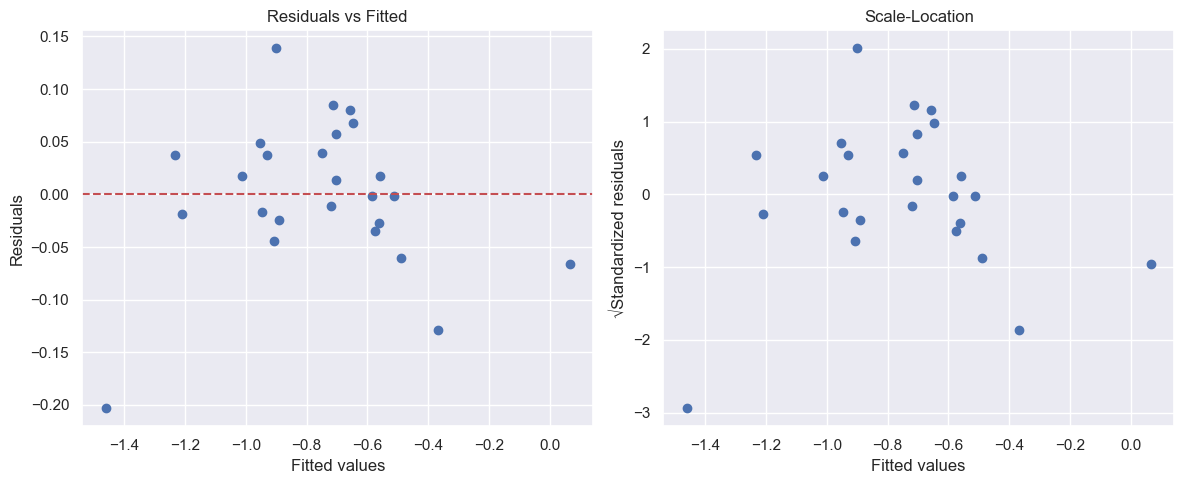

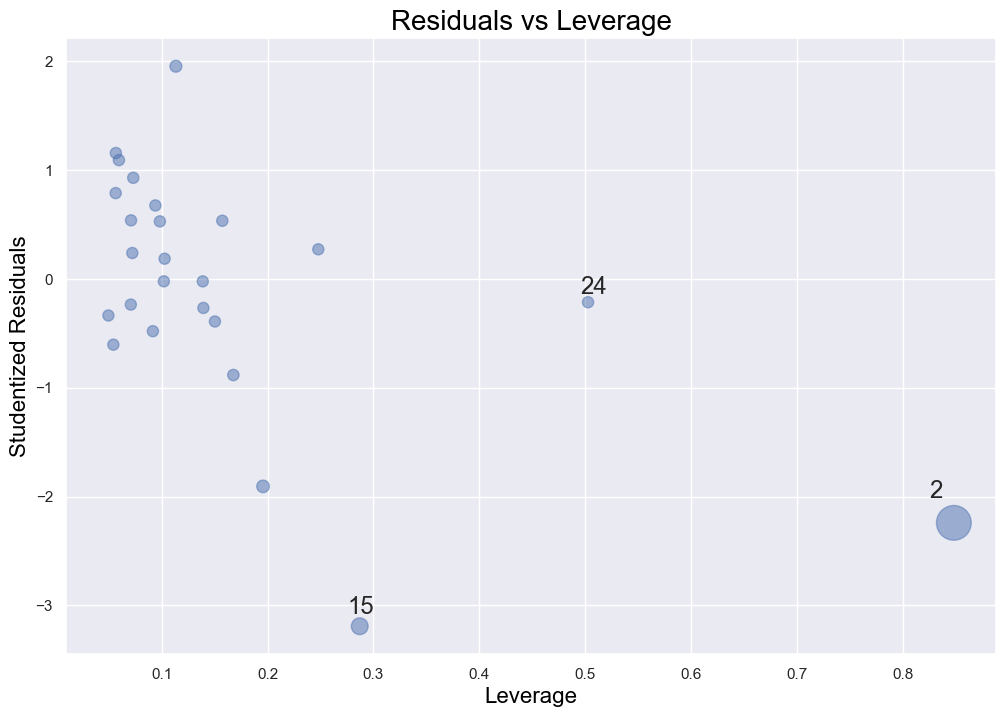

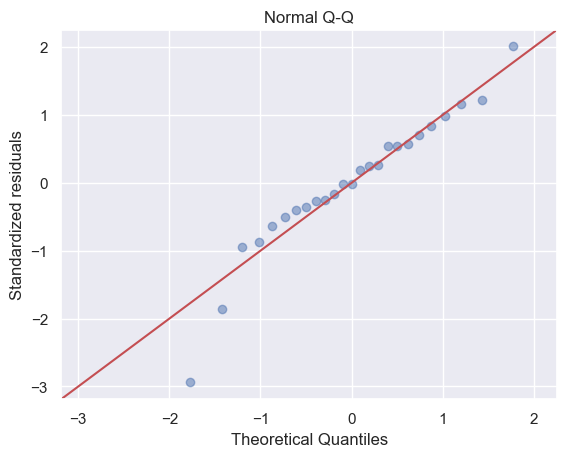

In [21]:
# Проводим анализ заново
enhanced_research = LinearRegressionResearch(y=new_data_t[explore_column], 
                                             x=new_data_t.drop(columns=explore_column))
enhanced_research.info()
enhanced_research.draw_plots()